In [1]:
import sklearn.cluster as cluster
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#Visualisasi data covid-19 di us
df = pd.read_csv('us-covid.csv')
df.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,05/11/2022,01/01/2020,05/07/2022,By Total,NaN,NaN,United States,All Sexes,All Ages,998698.0,7955604.0,887976.0,515907.0,11255.0,1380381.0,NaN
1,05/11/2022,01/01/2020,05/07/2022,By Total,NaN,NaN,United States,All Sexes,Under 1 year,275.0,44604.0,557.0,35.0,30.0,826.0,NaN
2,05/11/2022,01/01/2020,05/07/2022,By Total,NaN,NaN,United States,All Sexes,0-17 years,1045.0,79133.0,1604.0,276.0,216.0,2583.0,NaN
3,05/11/2022,01/01/2020,05/07/2022,By Total,NaN,NaN,United States,All Sexes,1-4 years,138.0,8356.0,327.0,32.0,75.0,506.0,NaN
4,05/11/2022,01/01/2020,05/07/2022,By Total,NaN,NaN,United States,All Sexes,5-14 years,334.0,13227.0,462.0,107.0,86.0,773.0,NaN


In [3]:
#1) menampilan data covid setiap negara bagian us pada tahun 2020
#Mengambil data negara bagian tanpa ada duplikasi data
unique_states = df[df['COVID-19 Deaths'] > 0][df['State'] != 'United States']['State'].unique()
unique_states.sort()
print(unique_states)

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'New York City' 'North Carolina'
 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Puerto Rico'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


C:\Users\yulia\AppData\Local\Temp\ipykernel_20160\1081809137.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unique_states = df[df['COVID-19 Deaths'] > 0][df['State'] != 'United States']['State'].unique()


In [4]:
#1) menampilan data covid setiap negara bagian us pada tahun 2020
covid_cases = []
for i in unique_states:
    covid_cases.append(df[df['COVID-19 Deaths'] > 0][df['State']==i][df['State'] != 'United States'][df['Sex'] == 'All Sexes']
                       [df['Age Group'] == 'All Ages'][df['Group'] == 'By Year'][df['Year']==2020].loc[:,'COVID-19 Deaths'].sum())

covid_cases = [int(i) for i in covid_cases]
print(covid_cases)

C:\Users\yulia\AppData\Local\Temp\ipykernel_20160\3763128363.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  covid_cases.append(df[df['COVID-19 Deaths'] > 0][df['State']==i][df['State'] != 'United States'][df['Sex'] == 'All Sexes']


[6706, 254, 9321, 4027, 33577, 5073, 6298, 1096, 1004, 21827, 10454, 365, 1541, 16721, 9775, 4769, 3510, 4619, 7066, 465, 6729, 10221, 12340, 5834, 5162, 8059, 1269, 2253, 3527, 828, 18164, 2886, 16189, 22282, 8789, 1513, 15097, 5248, 1612, 18407, 1629, 1918, 5705, 1715, 7927, 33542, 1657, 146, 6156, 3703, 1564, 6286, 461]


In [5]:
#1 menampilan data covid setiap negara bagian us pada tahun 2020
print(set(zip(unique_states,covid_cases)))

{('Oklahoma', 5248), ('Missouri', 8059), ('Georgia', 10454), ('New York', 16189), ('Vermont', 146), ('Delaware', 1096), ('West Virginia', 1564), ('Illinois', 16721), ('New Jersey', 18164), ('Puerto Rico', 1629), ('Utah', 1657), ('Virginia', 6156), ('Ohio', 15097), ('Washington', 3703), ('Wisconsin', 6286), ('Florida', 21827), ('Texas', 33542), ('Arizona', 9321), ('Arkansas', 4027), ('Massachusetts', 10221), ('South Dakota', 1715), ('District of Columbia', 1004), ('Tennessee', 7927), ('Connecticut', 6298), ('Indiana', 9775), ('Iowa', 4769), ('Michigan', 12340), ('Mississippi', 5162), ('Montana', 1269), ('Nebraska', 2253), ('Kansas', 3510), ('Kentucky', 4619), ('Alaska', 254), ('Hawaii', 365), ('Alabama', 6706), ('Maryland', 6729), ('Nevada', 3527), ('Minnesota', 5834), ('New Hampshire', 828), ('Louisiana', 7066), ('New York City', 22282), ('Rhode Island', 1918), ('Oregon', 1612), ('South Carolina', 5705), ('Pennsylvania', 18407), ('North Dakota', 1513), ('Wyoming', 461), ('California', 

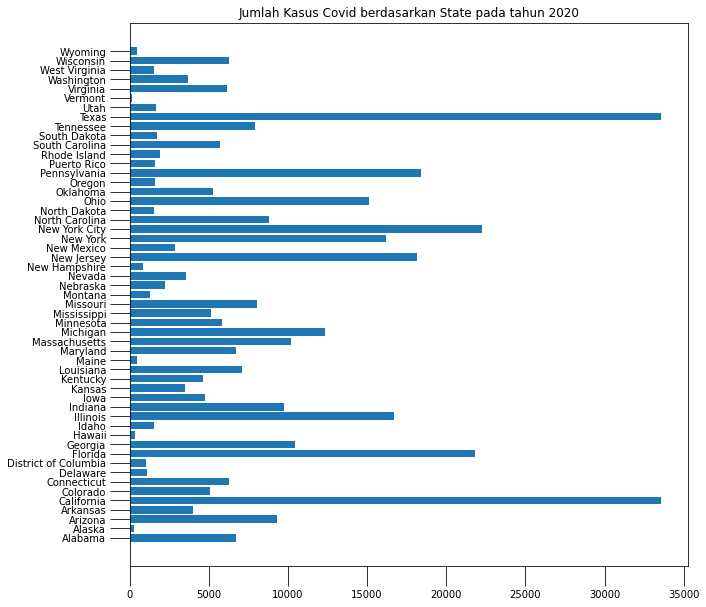

In [6]:
#1 menampilan data covid setiap negara bagian us pada tahun 2020
#Menampilkan data negara bagian dalam bentuk grafik batang
plt.figure(figsize=(10,10))
plt.barh(unique_states,covid_cases)
plt.tick_params(size=20,color='black')
plt.title('Jumlah Kasus Covid berdasarkan State pada tahun 2020')
plt.show()

In [7]:
#2a Menampilkan visualisasi kasu covid,pneumonia dan influenza untuk 2 tahun terakhir
#Memfilter kasus covid,pneumonia dan influenza pada tahun 2020(difiter secara terpisah)
unique_states = ['Alabama','Indiana','Nevada','Maryland']
covid_cases = []
pneumonia_cases = []
influenza_cases = []

for i in unique_states:
    covid_cases.append(df[df['COVID-19 Deaths'] > 0][df['State']==i][df['State'] != 'United States'][df['Sex'] == 'All Sexes']
                       [df['Age Group'] == 'All Ages'][df['Group'] == 'By Year'][df['Year']==2020].loc[:,'COVID-19 Deaths'].sum())
    pneumonia_cases.append(df[df['Pneumonia Deaths'] > 0][df['State']==i][df['State'] != 'United States'][df['Sex'] == 'All Sexes']
                       [df['Age Group'] == 'All Ages'][df['Group'] == 'By Year'][df['Year']==2020].loc[:,'Pneumonia Deaths'].sum())
    influenza_cases.append(df[df['Influenza Deaths'] > 0][df['State']==i][df['State'] != 'United States'][df['Sex'] == 'All Sexes']
                       [df['Age Group'] == 'All Ages'][df['Group'] == 'By Year'][df['Year']==2020].loc[:,'Influenza Deaths'].sum())

covid_cases = [int(i) for i in covid_cases]
pneumonia_cases = [int(i) for i in pneumonia_cases]
influenza_cases = [int(i) for i in influenza_cases]

print("Hasil untuk kasus 2020")
#Kasus Covid
print("Jumlah kasus Covid-19")
print(set(zip(unique_states,covid_cases)))

#Kasus Pneumonia
print("Jumlah kasus Pneumonia")
print(set(zip(unique_states,pneumonia_cases)))

#Kasus Influenza
print("Jumlah kasus Influenza")
print(set(zip(unique_states,influenza_cases)))


print("==================================")

#Memfilter kasus covid,pneumonia dan influenza pada tahun 2021
covid_cases_21 = []
pneumonia_cases_21 = []
influenza_cases_21 = []
for i in unique_states:
    covid_cases_21.append(df[df['COVID-19 Deaths'] > 0][df['State']==i][df['State'] != 'United States'][df['Sex'] == 'All Sexes']
                       [df['Age Group'] == 'All Ages'][df['Group'] == 'By Year'][df['Year']==2021].loc[:,'COVID-19 Deaths'].sum())
    pneumonia_cases_21.append(df[df['Pneumonia Deaths'] > 0][df['State']==i][df['State'] != 'United States'][df['Sex'] == 'All Sexes']
                       [df['Age Group'] == 'All Ages'][df['Group'] == 'By Year'][df['Year']==2021].loc[:,'Pneumonia Deaths'].sum())
    influenza_cases_21.append(df[df['Influenza Deaths'] > 0][df['State']==i][df['State'] != 'United States'][df['Sex'] == 'All Sexes']
                       [df['Age Group'] == 'All Ages'][df['Group'] == 'By Year'][df['Year']==2021].loc[:,'Influenza Deaths'].sum())
    
covid_cases_21 = [int(i) for i in covid_cases_21] 
pneumonia_cases_21 = [int(i) for i in pneumonia_cases_21]
influenza_cases_21 = [int(i) for i in influenza_cases_21]

#Hasil untuk kasus 2021
#Kasus Covid 19
print("Hasil untuk kasus 2021")
print("Jumlah kasus Covid-19")
print(set(zip(unique_states,covid_cases_21)))

#Kasus Pneumonia
print("Jumlah kasus Pneumonia")
print(set(zip(unique_states,pneumonia_cases_21)))

#Kasus Influenza
print("Jumlah kasus Influenza")
print(set(zip(unique_states,influenza_cases_21)))


#Memfilter kasus covid,pneumonia,influenza pada tahun 2022
covid_cases_22 = []
pneumonia_cases_22 = []
influenza_cases_22 = []
for i in unique_states:
    covid_cases_22.append(df[df['COVID-19 Deaths'] > 0][df['State']==i][df['State'] != 'United States'][df['Sex'] == 'All Sexes']
                       [df['Age Group'] == 'All Ages'][df['Group'] == 'By Year'][df['Year']==2022].loc[:,'COVID-19 Deaths'].sum())
    pneumonia_cases_22.append(df[df['Pneumonia Deaths'] > 0][df['State']==i][df['State'] != 'United States'][df['Sex'] == 'All Sexes']
                       [df['Age Group'] == 'All Ages'][df['Group'] == 'By Year'][df['Year']==2022].loc[:,'Pneumonia Deaths'].sum())
    influenza_cases_22.append(df[df['Influenza Deaths'] > 0][df['State']==i][df['State'] != 'United States'][df['Sex'] == 'All Sexes']
                       [df['Age Group'] == 'All Ages'][df['Group'] == 'By Year'][df['Year']==2022].loc[:,'Influenza Deaths'].sum())

covid_cases_22 = [int(i) for i in covid_cases_22]
pneumonia_cases_22 = [int(i) for i in pneumonia_cases_22]
influenza_cases_22 = [int(i) for i in influenza_cases_22]

#Kasus Covid 19
print("Hasil untuk kasus 2022")
print("Jumlah kasus Covid-19")
print(set(zip(unique_states,covid_cases_22)))

#Kasus Pneumonia
print("Jumlah kasus Pneumonia")
print(set(zip(unique_states,pneumonia_cases_22)))

#Kasus Influenza
print("Jumlah kasus Influenza")
print(set(zip(unique_states,influenza_cases_22)))

C:\Users\yulia\AppData\Local\Temp\ipykernel_20160\3433500608.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  covid_cases.append(df[df['COVID-19 Deaths'] > 0][df['State']==i][df['State'] != 'United States'][df['Sex'] == 'All Sexes']
C:\Users\yulia\AppData\Local\Temp\ipykernel_20160\3433500608.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pneumonia_cases.append(df[df['Pneumonia Deaths'] > 0][df['State']==i][df['State'] != 'United States'][df['Sex'] == 'All Sexes']
C:\Users\yulia\AppData\Local\Temp\ipykernel_20160\3433500608.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  influenza_cases.append(df[df['Influenza Deaths'] > 0][df['State']==i][df['State'] != 'United States'][df['Sex'] == 'All Sexes']


Hasil untuk kasus 2020
Jumlah kasus Covid-19
{('Indiana', 9775), ('Alabama', 6706), ('Nevada', 3527), ('Maryland', 6729)}
Jumlah kasus Pneumonia
{('Maryland', 5856), ('Alabama', 5213), ('Nevada', 4354), ('Indiana', 8902)}
Jumlah kasus Influenza
{('Indiana', 178), ('Maryland', 151), ('Nevada', 56), ('Alabama', 140)}


C:\Users\yulia\AppData\Local\Temp\ipykernel_20160\3433500608.py:41: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  covid_cases_21.append(df[df['COVID-19 Deaths'] > 0][df['State']==i][df['State'] != 'United States'][df['Sex'] == 'All Sexes']
C:\Users\yulia\AppData\Local\Temp\ipykernel_20160\3433500608.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pneumonia_cases_21.append(df[df['Pneumonia Deaths'] > 0][df['State']==i][df['State'] != 'United States'][df['Sex'] == 'All Sexes']
C:\Users\yulia\AppData\Local\Temp\ipykernel_20160\3433500608.py:45: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  influenza_cases_21.append(df[df['Influenza Deaths'] > 0][df['State']==i][df['State'] != 'United States'][df['Sex'] == 'All Sexes']


Hasil untuk kasus 2021
Jumlah kasus Covid-19
{('Alabama', 9715), ('Maryland', 6091), ('Nevada', 5642), ('Indiana', 10050)}
Jumlah kasus Pneumonia
{('Alabama', 6353), ('Nevada', 5928), ('Maryland', 5693), ('Indiana', 9498)}
Jumlah kasus Influenza
{('Maryland', 11), ('Alabama', 36), ('Indiana', 23), ('Nevada', 0)}


C:\Users\yulia\AppData\Local\Temp\ipykernel_20160\3433500608.py:72: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  covid_cases_22.append(df[df['COVID-19 Deaths'] > 0][df['State']==i][df['State'] != 'United States'][df['Sex'] == 'All Sexes']
C:\Users\yulia\AppData\Local\Temp\ipykernel_20160\3433500608.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pneumonia_cases_22.append(df[df['Pneumonia Deaths'] > 0][df['State']==i][df['State'] != 'United States'][df['Sex'] == 'All Sexes']
C:\Users\yulia\AppData\Local\Temp\ipykernel_20160\3433500608.py:76: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  influenza_cases_22.append(df[df['Influenza Deaths'] > 0][df['State']==i][df['State'] != 'United States'][df['Sex'] == 'All Sexes']


Hasil untuk kasus 2022
Jumlah kasus Covid-19
{('Nevada', 1847), ('Alabama', 2909), ('Indiana', 3908), ('Maryland', 2668)}
Jumlah kasus Pneumonia
{('Nevada', 1877), ('Indiana', 3241), ('Alabama', 1838), ('Maryland', 2094)}
Jumlah kasus Influenza
{('Maryland', 20), ('Alabama', 24), ('Nevada', 0), ('Indiana', 47)}


In [8]:
#2b Menampilkan visualisasi kasu covid,pneumonia dan influenza untuk total keseluruhan dari tahun 2020-2022
#'Alabama','Indiana','Nevada','Maryland'
#memfilter kasus covid,pneumonia dan influenza berdasarkan state untuk 2020-2022

covid_cases_total = []
pneumonia_cases_total = []
influenza_cases_total = []
for i in unique_states:
    covid_cases_total.append(df[df['COVID-19 Deaths'] > 0][df['State']==i][df['State'] != 'United States'][df['Sex'] == 'All Sexes']
                       [df['Age Group'] == 'All Ages'][df['Group'] == 'By Total'].loc[:,'COVID-19 Deaths'].sum())
    pneumonia_cases_total.append(df[df['Pneumonia Deaths'] > 0][df['State']==i][df['State'] != 'United States'][df['Sex'] == 'All Sexes']
                       [df['Age Group'] == 'All Ages'][df['Group'] == 'By Total'].loc[:,'Pneumonia Deaths'].sum())
    influenza_cases_total.append(df[df['Influenza Deaths'] > 0][df['State']==i][df['State'] != 'United States'][df['Sex'] == 'All Sexes']
                       [df['Age Group'] == 'All Ages'][df['Group'] == 'By Total'].loc[:,'Influenza Deaths'].sum())

covid_cases_total = [int(i) for i in covid_cases_total]
pneumonia_cases_total = [int(i) for i in pneumonia_cases_total]
influenza_cases_total = [int(i) for i in influenza_cases_total]

#Kasus Covid 19
print("Hasil data covid,pneumonia dan influenza dari tahun 2020-2022")
print("Jumlah kasus Covid-19")
print(set(zip(unique_states,covid_cases_total)))

print("\n")

#Kasus Pneumonia
print("Jumlah kasus Pneumonia")
print(set(zip(unique_states,pneumonia_cases_total)))

print("\n")

#Kasus Influenza
print("Jumlah kasus Influenza")
print(set(zip(unique_states,influenza_cases_total)))

C:\Users\yulia\AppData\Local\Temp\ipykernel_20160\832920724.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  covid_cases_total.append(df[df['COVID-19 Deaths'] > 0][df['State']==i][df['State'] != 'United States'][df['Sex'] == 'All Sexes']
C:\Users\yulia\AppData\Local\Temp\ipykernel_20160\832920724.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pneumonia_cases_total.append(df[df['Pneumonia Deaths'] > 0][df['State']==i][df['State'] != 'United States'][df['Sex'] == 'All Sexes']
C:\Users\yulia\AppData\Local\Temp\ipykernel_20160\832920724.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  influenza_cases_total.append(df[df['Influenza Deaths'] > 0][df['State']==i][df['State'] != 'United States'][df['Sex'] == 'All Sexes']


Hasil data covid,pneumonia dan influenza dari tahun 2020-2022
Jumlah kasus Covid-19
{('Nevada', 11016), ('Alabama', 19330), ('Indiana', 23733), ('Maryland', 15488)}


Jumlah kasus Pneumonia
{('Maryland', 13643), ('Nevada', 12159), ('Indiana', 21641), ('Alabama', 13404)}


Jumlah kasus Influenza
{('Maryland', 182), ('Indiana', 248), ('Alabama', 200), ('Nevada', 74)}


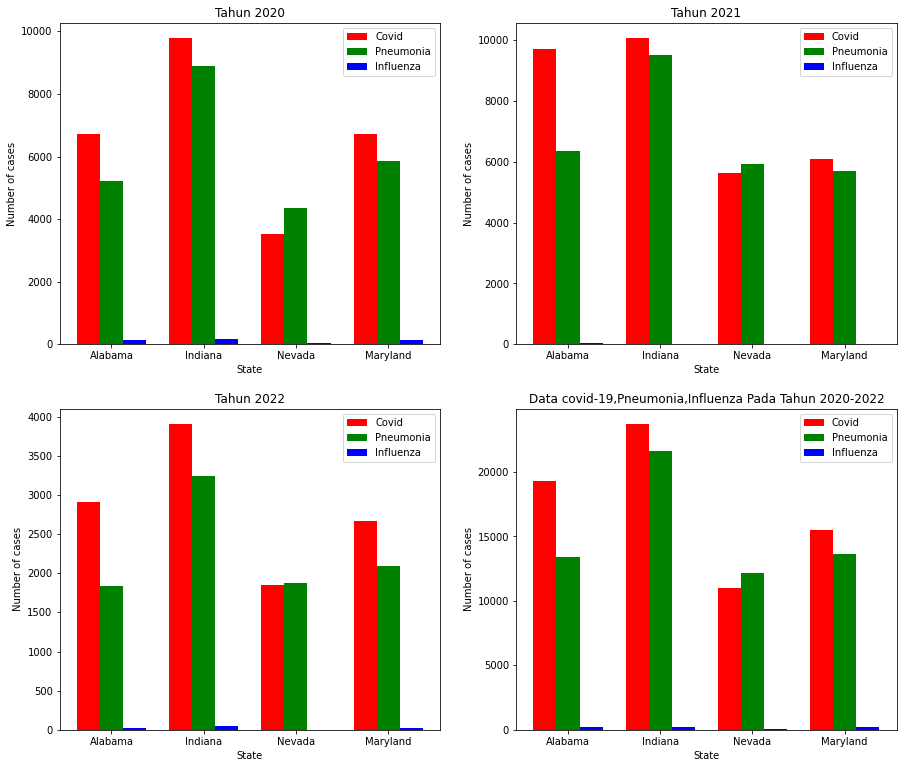

In [9]:
#2c Menampilkan visualisasi kasus covid,pneumonia menggunakan grafik batang
#N untuk x label
N = 4
ind = np.arange(N) 
width = 0.25

#menentukan ukuran baris dan kolom
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(15,13))

#Untuk tahun 2020
bar1 = ax[0,0].bar(ind,covid_cases,width,color='r')
bar2 = ax[0,0].bar(ind+width,pneumonia_cases,width,color='g')
bar3 = ax[0,0].bar(ind+width*2,influenza_cases,width,color='b')

ax[0,0].set_xlabel('State')
ax[0,0].set_ylabel('Number of cases')
ax[0,0].set_xticks(ind+width,unique_states)
ax[0,0].title.set_text('Tahun 2020')
ax[0,0].legend((bar1,bar2,bar3),('Covid','Pneumonia','Influenza'))

#untuk tahun 2021
bar4 = ax[0,1].bar(ind,covid_cases_21,width,color='r')
bar5 = ax[0,1].bar(ind+width,pneumonia_cases_21,width,color="g")
bar6 = ax[0,1].bar(ind+width*2,influenza_cases_21,width,color='b')

ax[0,1].set_xlabel('State')
ax[0,1].set_ylabel('Number of cases')
ax[0,1].set_xticks(ind+width,unique_states)
ax[0,1].title.set_text('Tahun 2021')
ax[0,1].legend((bar4,bar5,bar6),('Covid','Pneumonia','Influenza'))

#untuk tahun 2022
bar7 = ax[1,0].bar(ind,covid_cases_22,width,color='r')
bar8 = ax[1,0].bar(ind+width,pneumonia_cases_22,width,color='g')
bar9 = ax[1,0].bar(ind+width*2,influenza_cases_22,width,color='b')

ax[1,0].set_xlabel('State')
ax[1,0].set_ylabel('Number of cases')
ax[1,0].set_xticks(ind+width,unique_states)
ax[1,0].title.set_text('Tahun 2022')
ax[1,0].legend((bar7,bar8,bar9),('Covid','Pneumonia','Influenza'))

#Data hasil untuk 2020-2021
bar10 = ax[1,1].bar(ind,covid_cases_total,width,color='r')
bar11 = ax[1,1].bar(ind+width,pneumonia_cases_total,width,color='g')
bar12 = ax[1,1].bar(ind+width*2,influenza_cases_total,width,color='b')

ax[1,1].set_xlabel('State')
ax[1,1].set_ylabel('Number of cases')
ax[1,1].set_xticks(ind+width,unique_states)
ax[1,1].title.set_text('Data covid-19,Pneumonia,Influenza Pada Tahun 2020-2022')
ax[1,1].legend((bar10,bar11,bar12),('Covid','Pneumonia','Influenza'))

plt.show()

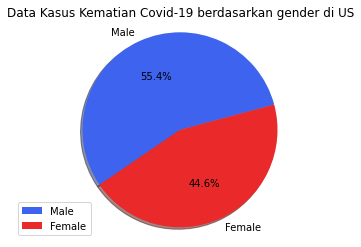

In [10]:
#3 Menampilkan data gender yang meninggal terkena covid-19 di united States
#menampilkan grafik pie chart
gender_labels = ['Male','Female']
total_cases = [553049,445649]

my_colors = ['#3e64ef','#ea2a2a']
my_explode = (0, 0)
plt.pie(total_cases, labels=gender_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Data Kasus Kematian Covid-19 berdasarkan gender di US')
plt.axis('equal')
plt.legend()
plt.show()

In [11]:
#4 menampilkan data gender dan usia yang meninggal karena covid-19 untuk 2 tahun terakhir di united states
#memfilter data usia tanpa memasukkan all ages
unique_ages = df[df['COVID-19 Deaths'] > 0][df['State'] != 'United States'][df['Age Group'] != 'All Ages']['Age Group'].unique()

C:\Users\yulia\AppData\Local\Temp\ipykernel_20160\998968439.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unique_ages = df[df['COVID-19 Deaths'] > 0][df['State'] != 'United States'][df['Age Group'] != 'All Ages']['Age Group'].unique()


In [12]:
#4 menampilkan data gender dan usia yang meninggal karena covid-19
print(unique_ages)

['0-17 years' '15-24 years' '18-29 years' '25-34 years' '30-39 years'
 '35-44 years' '40-49 years' '45-54 years' '50-64 years' '55-64 years'
 '65-74 years' '75-84 years' '85 years and over' '5-14 years'
 'Under 1 year' '1-4 years']


In [13]:
#4 menampilkan data gender dan usia yang meninggal karena covid-19
#mencari jumlah total male dan female di united states
total_male = []
total_female = []
for i in unique_ages:
    total_male.append(df[df['COVID-19 Deaths'] > 0][df['Age Group']==i][df['State'] == 'United States'][df['Sex'] == 'Male']
                       [df['Age Group'] != 'All Ages'][df['Group'] == 'By Total'].loc[:,'COVID-19 Deaths'].sum())
    total_female.append(df[df['COVID-19 Deaths'] > 0][df['Age Group']==i][df['State'] == 'United States'][df['Sex'] == 'Female']
                       [df['Age Group'] != 'All Ages'][df['Group'] == 'By Total'].loc[:,'COVID-19 Deaths'].sum())

total_male = [int(i) for i in total_male]
total_female = [int(i) for i in total_female]

#Data gender untuk male
print("Male")
print(set(zip(unique_ages,total_male)))

#Data gender untuk female
print("Female")
print(set(zip(unique_ages,total_female)))     

C:\Users\yulia\AppData\Local\Temp\ipykernel_20160\2692495768.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  total_male.append(df[df['COVID-19 Deaths'] > 0][df['Age Group']==i][df['State'] == 'United States'][df['Sex'] == 'Male']
C:\Users\yulia\AppData\Local\Temp\ipykernel_20160\2692495768.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  total_female.append(df[df['COVID-19 Deaths'] > 0][df['Age Group']==i][df['State'] == 'United States'][df['Sex'] == 'Female']


Male
{('18-29 years', 3814), ('75-84 years', 144726), ('55-64 years', 90650), ('Under 1 year', 146), ('40-49 years', 27046), ('45-54 years', 42672), ('1-4 years', 68), ('0-17 years', 551), ('35-44 years', 17219), ('25-34 years', 6853), ('65-74 years', 136604), ('15-24 years', 1560), ('85 years and over', 112378), ('30-39 years', 11257), ('5-14 years', 173), ('50-64 years', 116673)}
Female
{('50-64 years', 70599), ('15-24 years', 1083), ('75-84 years', 112827), ('35-44 years', 10474), ('40-49 years', 15915), ('45-54 years', 23879), ('30-39 years', 6891), ('0-17 years', 494), ('55-64 years', 56235), ('25-34 years', 4311), ('Under 1 year', 129), ('18-29 years', 2443), ('1-4 years', 70), ('5-14 years', 161), ('85 years and over', 143402), ('65-74 years', 93078)}


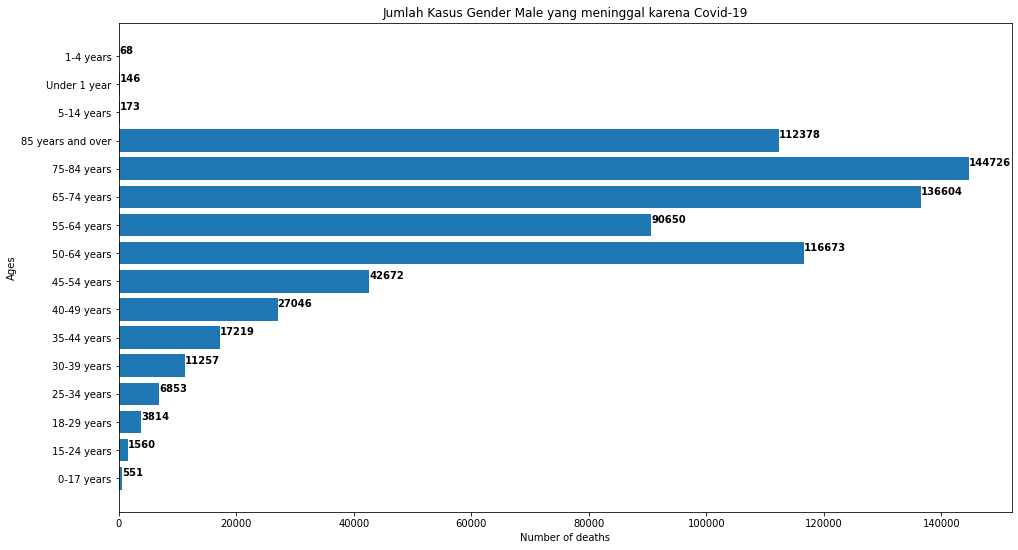

In [14]:
#4 menampilkan data gender dan usia yang meninggal karena covid-19
#4a menampilkan data gender pria dan usianya yang meninggal karena covid-19
fig, ax = plt.subplots(figsize=(16, 9))

ax.barh(unique_ages,total_male)

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='black')

ax.set_xlabel('Number of deaths')
ax.set_ylabel('Ages')
  
ax.title.set_text('Jumlah Kasus Gender Male yang meninggal karena Covid-19')
plt.show()

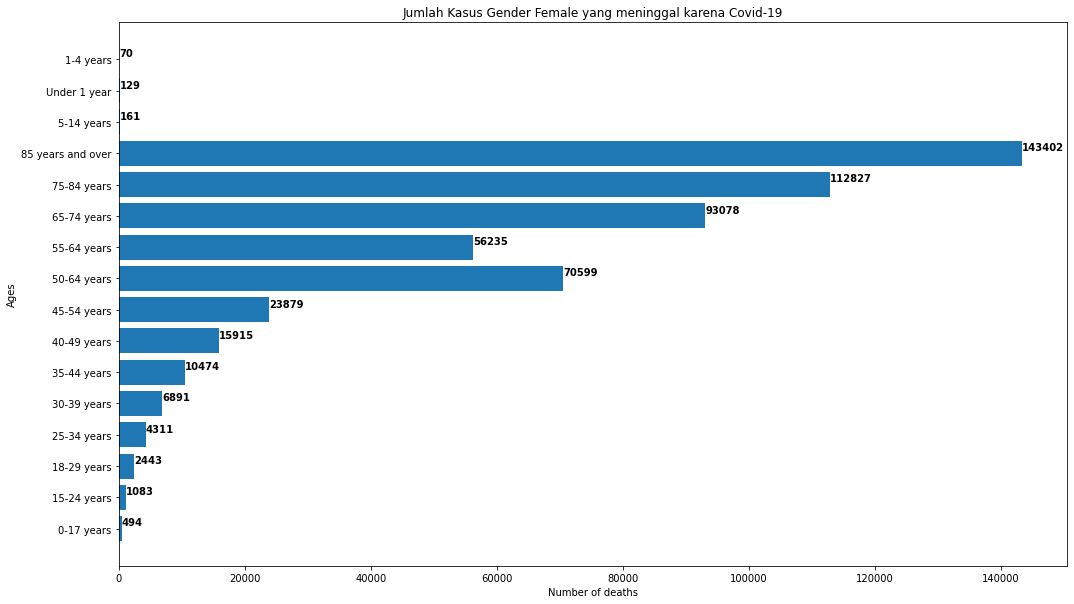

In [15]:
#4 menampilkan data gender dan usia yang meninggal karena covid-19
#4b menampilkan data gender wanita dan usianya yang meninggal karena covid-19

fig, ax = plt.subplots(figsize=(17, 10))

ax.barh(unique_ages,total_female)

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='black')

ax.set_xlabel('Number of deaths')
ax.set_ylabel('Ages')
  
ax.title.set_text('Jumlah Kasus Gender Female yang meninggal karena Covid-19')
plt.show()

In [16]:
#5 Menampilkan data usia lansia yang meninggal karena pneumonia dan covid-19 pada tahun 2020-2022
count_total_20 = []
count_total_21 = []
count_total_22 = []
unique_ages = ['65-74 years','75-84 years','85 years and over']
for i in unique_ages:
    count_total_20.append(df[df['Pneumonia and COVID-19 Deaths'] > 0][df['Age Group']==i][df['State'] == 'United States'][df['Sex'] == 'All Sexes']
                       [df['Age Group'] != 'All Ages'][df['Group'] == 'By Year'][df['Year'] == 2020].loc[:,'Pneumonia and COVID-19 Deaths'].sum())
    count_total_21.append(df[df['Pneumonia and COVID-19 Deaths'] > 0][df['Age Group']==i][df['State'] == 'United States'][df['Sex'] == 'All Sexes']
                       [df['Age Group'] != 'All Ages'][df['Group'] == 'By Year'][df['Year'] == 2021].loc[:,'Pneumonia and COVID-19 Deaths'].sum())
    count_total_22.append(df[df['Pneumonia and COVID-19 Deaths'] > 0][df['Age Group']==i][df['State'] == 'United States'][df['Sex'] == 'All Sexes']
                       [df['Age Group'] != 'All Ages'][df['Group'] == 'By Year'][df['Year'] == 2022].loc[:,'Pneumonia and COVID-19 Deaths'].sum())

count_total_20 = [int(i) for i in count_total_20]
count_total_21 = [int(i) for i in count_total_21]
count_total_22 = [int(i) for i in count_total_22]

print(count_total_20)
print(count_total_21)
print(count_total_22)

C:\Users\yulia\AppData\Local\Temp\ipykernel_20160\2446257394.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count_total_20.append(df[df['Pneumonia and COVID-19 Deaths'] > 0][df['Age Group']==i][df['State'] == 'United States'][df['Sex'] == 'All Sexes']
C:\Users\yulia\AppData\Local\Temp\ipykernel_20160\2446257394.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count_total_21.append(df[df['Pneumonia and COVID-19 Deaths'] > 0][df['Age Group']==i][df['State'] == 'United States'][df['Sex'] == 'All Sexes']
C:\Users\yulia\AppData\Local\Temp\ipykernel_20160\2446257394.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count_total_22.append(df[df['Pneumonia and COVID-19 Deaths'] > 0][df['Age Group']==i][df['State'] == 'United States'][df['Sex'] == 'All Sexes']


[42271, 51909, 49446]
[66608, 62838, 45248]
[19736, 21132, 16640]


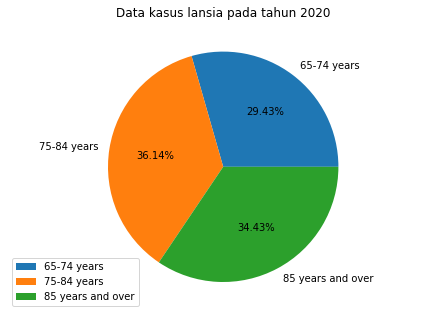

In [17]:
#5 Menampilkan data usia lansia yang meninggal karena pneumonia dan covid-19 pada tahun 2020-2022
#Data lansia yang meninggal karena pneumonia dan covid-19 pada tahun 2020
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

ax.pie(count_total_20, labels = unique_ages,autopct='%1.2f%%')
plt.title('Data kasus lansia pada tahun 2020')
plt.legend(unique_ages,loc=3)
plt.show()

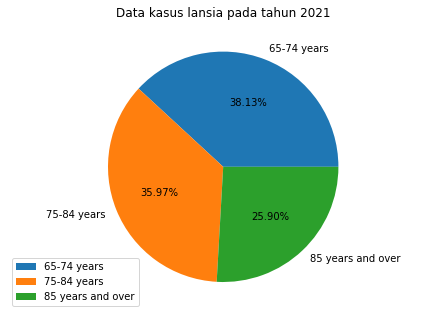

In [18]:
#5 Menampilkan data usia lansia yang meninggal karena pneumonia dan covid-19 pada tahun 2020-2022
#Data lansia yang meninggal karena pneumonia dan covid-19 pada tahun 2021
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

ax.pie(count_total_21, labels = unique_ages,autopct='%1.2f%%')
plt.title('Data kasus lansia pada tahun 2021')
plt.legend(unique_ages,loc=3)
plt.show()

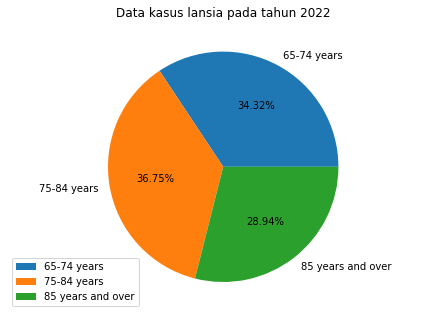

In [19]:
#5 Menampilkan data usia lansia yang meninggal karena pneumonia dan covid-19 pada tahun 2020-2022
#Data lansia yang meninggal karena pneumonia dan covid-19 pada tahun 2022
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

ax.pie(count_total_22, labels = unique_ages,autopct='%1.2f%%')
plt.title('Data kasus lansia pada tahun 2022')
plt.legend(unique_ages,loc=3)
plt.show()

In [20]:
# Melakukan cluster berdasarkan jumlah kasus dan kematian di eropa
df = pd.read_csv('data_eropa.csv')
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2020,continentExp
0,09/05/2022,9,5,2022,4787.0,3.0,Austria,AT,AUT,8901064,Europe
1,08/05/2022,8,5,2022,3957.0,15.0,Austria,AT,AUT,8901064,Europe
2,07/05/2022,7,5,2022,3521.0,3.0,Austria,AT,AUT,8901064,Europe
3,06/05/2022,6,5,2022,5164.0,4.0,Austria,AT,AUT,8901064,Europe
4,05/05/2022,5,5,2022,6149.0,5.0,Austria,AT,AUT,8901064,Europe


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23427 entries, 0 to 23426
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   dateRep                  23427 non-null  object 
 1   day                      23427 non-null  int64  
 2   month                    23427 non-null  int64  
 3   year                     23427 non-null  int64  
 4   cases                    23374 non-null  float64
 5   deaths                   23150 non-null  float64
 6   countriesAndTerritories  23427 non-null  object 
 7   geoId                    23427 non-null  object 
 8   countryterritoryCode     23427 non-null  object 
 9   popData2020              23427 non-null  int64  
 10  continentExp             23427 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 2.0+ MB


In [22]:
#mengubah tipe data kolum cases dan deaths menjadi tipe int
df['cases'] = df['cases'].fillna(0)
df['cases'] = df['cases'].astype(dtype='int64')

df['deaths'] = df['deaths'].fillna(0)
df['deaths'] = df['deaths'].astype(dtype='int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23427 entries, 0 to 23426
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dateRep                  23427 non-null  object
 1   day                      23427 non-null  int64 
 2   month                    23427 non-null  int64 
 3   year                     23427 non-null  int64 
 4   cases                    23427 non-null  int64 
 5   deaths                   23427 non-null  int64 
 6   countriesAndTerritories  23427 non-null  object
 7   geoId                    23427 non-null  object
 8   countryterritoryCode     23427 non-null  object
 9   popData2020              23427 non-null  int64 
 10  continentExp             23427 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


<function matplotlib.pyplot.show(close=None, block=None)>

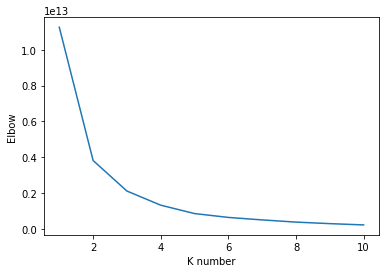

In [23]:
#mencari nilai k yang optimal dengan menggunakan metode elbow
kluster = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(df[['cases','deaths']])
    kluster.append(km.inertia_)

plt.xlabel('K number')
plt.ylabel('Elbow')
plt.plot(range(1,11),kluster)
plt.show

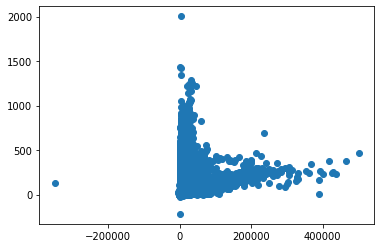

In [24]:
#memvisualisasi data cases dan deaths menggunakan scatter
plt.scatter(df['cases'],df['deaths'])

In [25]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['cases','deaths']])
df['cluster'] = y_predicted
y_predicted

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2020,continentExp,cluster
0,09/05/2022,9,5,2022,4787,3,Austria,AT,AUT,8901064,Europe,0
1,08/05/2022,8,5,2022,3957,15,Austria,AT,AUT,8901064,Europe,0
2,07/05/2022,7,5,2022,3521,3,Austria,AT,AUT,8901064,Europe,0
3,06/05/2022,6,5,2022,5164,4,Austria,AT,AUT,8901064,Europe,0
4,05/05/2022,5,5,2022,6149,5,Austria,AT,AUT,8901064,Europe,0


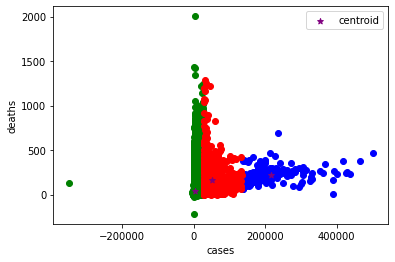

In [27]:
#menampilan visualisasi cluster beserta centroidnya
df1 = df[df.cluster ==0]
df2 = df[df.cluster ==1]
df3 = df[df.cluster ==2]

plt.scatter(df1.cases,df1['deaths'],color="green")
plt.scatter(df2.cases,df2['deaths'],color="blue")
plt.scatter(df3.cases,df3['deaths'],color="red")

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('cases')
plt.ylabel('deaths')
plt.legend()

In [28]:
df.sort_values(by=['cluster'])

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2020,continentExp,cluster
0,09/05/2022,9,5,2022,4787,3,Austria,AT,AUT,8901064,Europe,0
15450,03/02/2022,3,2,2022,240,3,Malta,MT,MLT,514564,Europe,0
15449,04/02/2022,4,2,2022,214,1,Malta,MT,MLT,514564,Europe,0
15448,05/02/2022,5,2,2022,195,5,Malta,MT,MLT,514564,Europe,0
15447,06/02/2022,6,2,2022,158,4,Malta,MT,MLT,514564,Europe,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21866,09/01/2022,9,1,2022,127894,136,Spain,ES,ESP,47332614,Europe,2
21862,13/01/2022,13,1,2022,118589,184,Spain,ES,ESP,47332614,Europe,2
21861,14/01/2022,14,1,2022,106601,191,Spain,ES,ESP,47332614,Europe,2
21859,16/01/2022,16,1,2022,100899,214,Spain,ES,ESP,47332614,Europe,2


In [29]:
#memprediksi kasus covid dengan linear regression
dt = pd.read_csv('data_eropa.csv')
dt.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2020,continentExp
0,09/05/2022,9,5,2022,4787.0,3.0,Austria,AT,AUT,8901064,Europe
1,08/05/2022,8,5,2022,3957.0,15.0,Austria,AT,AUT,8901064,Europe
2,07/05/2022,7,5,2022,3521.0,3.0,Austria,AT,AUT,8901064,Europe
3,06/05/2022,6,5,2022,5164.0,4.0,Austria,AT,AUT,8901064,Europe
4,05/05/2022,5,5,2022,6149.0,5.0,Austria,AT,AUT,8901064,Europe


In [30]:
#mengkelompokkan data berdasarkan wilayah
grouped = dt.groupby('countriesAndTerritories')

In [31]:
#memfilter data berdasarkan wilyah yang sudah ditentukan
df = pd.DataFrame()
for name,group in grouped:
    if name == 'Bulgaria':
        df = group

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 796 entries, 1604 to 2399
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   dateRep                  796 non-null    object 
 1   day                      796 non-null    int64  
 2   month                    796 non-null    int64  
 3   year                     796 non-null    int64  
 4   cases                    795 non-null    float64
 5   deaths                   793 non-null    float64
 6   countriesAndTerritories  796 non-null    object 
 7   geoId                    796 non-null    object 
 8   countryterritoryCode     796 non-null    object 
 9   popData2020              796 non-null    int64  
 10  continentExp             796 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 74.6+ KB


In [33]:
#menukar tipe data float pada cases dan deaths menjadi int
df['cases'] = df['cases'].fillna(0)
df['cases'] = df['cases'].astype(dtype='int64')

df['deaths'] = df['deaths'].fillna(0)
df['deaths'] = df['deaths'].astype(dtype='int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 796 entries, 1604 to 2399
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dateRep                  796 non-null    object
 1   day                      796 non-null    int64 
 2   month                    796 non-null    int64 
 3   year                     796 non-null    int64 
 4   cases                    796 non-null    int64 
 5   deaths                   796 non-null    int64 
 6   countriesAndTerritories  796 non-null    object
 7   geoId                    796 non-null    object
 8   countryterritoryCode     796 non-null    object
 9   popData2020              796 non-null    int64 
 10  continentExp             796 non-null    object
dtypes: int64(6), object(5)
memory usage: 74.6+ KB


In [34]:
df = df[['day','month','year','cases','deaths']]
df = df.iloc[::-1]
xFrame = df.drop('deaths',axis = 1)
yFrame = df['deaths']

In [35]:
#membagi dara menjadi data latih dan data uji
xtrain,xtest,ytrain,ytest = train_test_split(xFrame.values,yFrame.values,test_size = 0.25,shuffle=False)

In [36]:
#memprediksi 
model = LinearRegression()
model.fit(xtrain,ytrain)
prediction = model.predict(xtest)

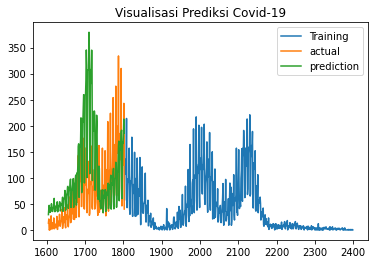

In [37]:
plt.plot(df.index[:-len(prediction)],ytrain,label="Training")
plt.plot(df.index[-len(prediction):],ytest,label="actual")
plt.plot(df.index[-len(prediction):],prediction,label="prediction")
plt.title("Visualisasi Prediksi Covid-19")
plt.legend(loc=1)
plt.show()